In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.923990,0.194956
1,a,two,-1.018264,0.195225
2,b,one,2.608365,0.417704
3,b,two,-0.296999,0.541430
4,a,one,0.390449,0.179488


In [11]:
grouped = df.groupby('key1')

for name, group in grouped:
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.923990  0.194956
1    a  two -1.018264  0.195225
4    a  one  0.390449  0.179488
b
  key1 key2     data1     data2
2    b  one  2.608365  0.417704
3    b  two -0.296999  0.541430


In [12]:
grouped.mean()

,data1,data2
key1,,
a,0.432058,0.189889
b,1.155683,0.479567


In [13]:
grouped = df.groupby(['key1', 'key2'])

for (k1, k2), group in grouped:
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  1.923990  0.194956
4    a  one  0.390449  0.179488
a two
  key1 key2     data1     data2
1    a  two -1.018264  0.195225
b one
  key1 key2     data1     data2
2    b  one  2.608365  0.417704
b two
  key1 key2     data1    data2
3    b  two -0.296999  0.54143


In [14]:
grouped.mean()

data1     data2
key1 key2                    
a    one   1.157220  0.187222
     two  -1.018264  0.195225
b    one   2.608365  0.417704
     two  -0.296999  0.541430

In [15]:
tips = pd.read_csv('../tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [18]:
grouped = tips.groupby(['sex', 'smoker'])


In [19]:
grouped.agg(['mean', 'std'])

/tmp/ipykernel_7033/3943835241.py:1: FutureWarning: ['day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(['mean', 'std'])


total_bill                 tip                size            \
                    mean       std      mean       std      mean       std   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

                tip_pct            
                   mean       std  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588

In [20]:
taxis = pd.read_csv("../nyc_taxi_trip_data_sample.csv")

In [21]:
taxis.pickup_datetime

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: object

In [23]:
taxis = pd.read_csv("../nyc_taxi_trip_data_sample.csv", parse_dates=['pickup_datetime', 'dropoff_datetime'])
taxis

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


In [24]:
taxis.pickup_datetime

0         2013-10-04 20:20:00
1         2013-09-27 14:16:04
2         2013-07-18 13:24:37
3         2013-06-25 12:12:00
4         2013-04-19 05:28:00
                  ...        
1731792   2013-08-02 03:34:00
1731793   2013-02-21 12:44:00
1731794   2013-02-16 17:24:00
1731795   2013-05-24 10:29:16
1731796   2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: datetime64[ns]

In [25]:
weekly = taxis.groupby(taxis.pickup_datetime.dt.isocalendar().week)
len(weekly)

52

In [26]:
y = weekly.size()
y.head(3)

week
1    35125
2    32415
3    34478
dtype: int64

<AxesSubplot:>

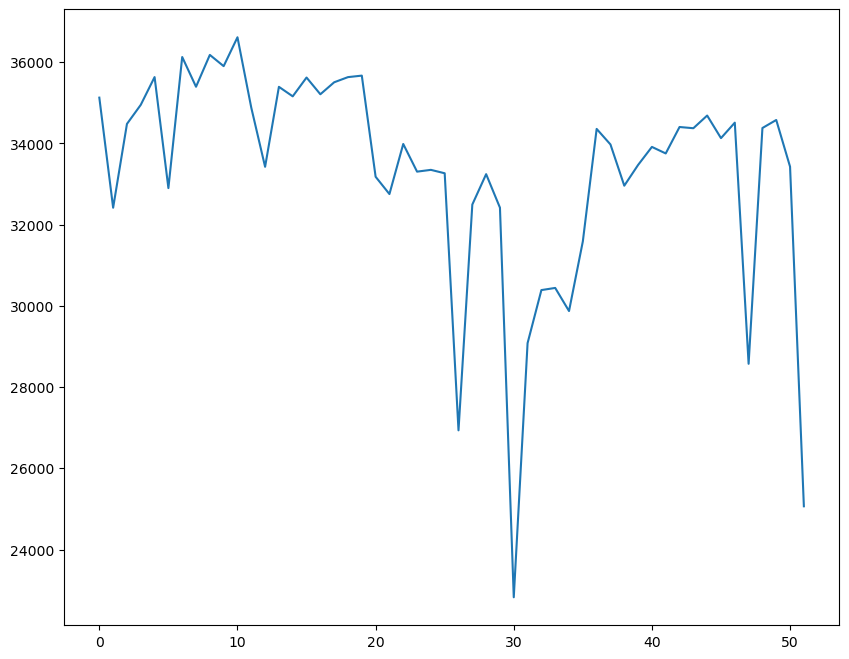

In [27]:
pd.Series(y.values).plot(figsize=(10, 8))

In [28]:
x = weekly.pickup_datetime.min()
x[:3]

week
1   2013-01-01 00:00:00
2   2013-01-07 00:00:29
3   2013-01-14 00:00:00
Name: pickup_datetime, dtype: datetime64[ns]

In [29]:
x.loc[1].day_name()

'Tuesday'

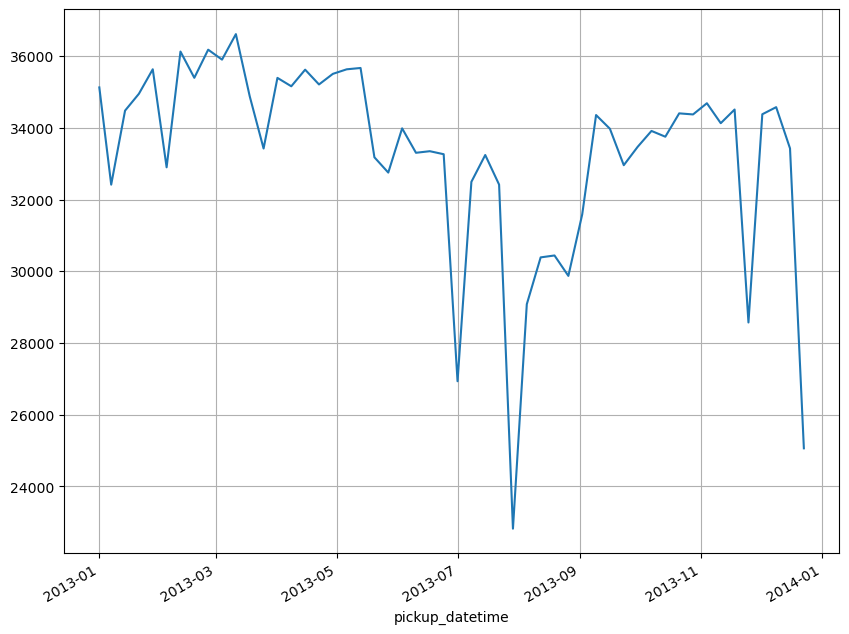

In [30]:
pd.Series(y.values, index=x).plot(figsize=(10,  8))
plt.grid()

In [31]:
dayofweek_rides = taxis.groupby(taxis.pickup_datetime.dt.dayofweek)
len(dayofweek_rides)

7

In [32]:
dayofweek_rides_num = dayofweek_rides.size()
dayofweek_rides_num

pickup_datetime
0    224342
1    246768
2    249750
3    255900
4    263773
5    262127
6    229137
dtype: int64

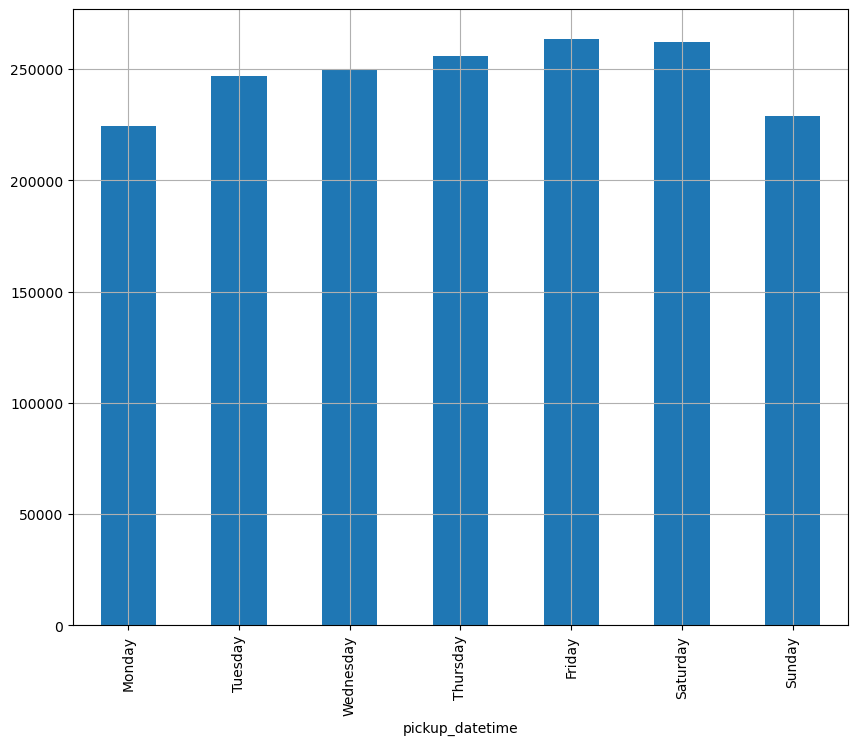

In [33]:
dayofweek_rides_num.plot(kind='bar', figsize=(10, 8))
plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()

In [34]:
hourly_rides = taxis.groupby(taxis.pickup_datetime.dt.hour)
len(hourly_rides)

24

In [35]:
hourly_rides_num = hourly_rides.size()
hourly_rides_num

pickup_datetime
0      69279
1      50967
2      38098
3      27537
4      20058
5      17475
6      35918
7      62327
8      77968
9      80253
10     78149
11     80642
12     85324
13     84133
14     86588
15     83057
16     69029
17     83954
18    104198
19    108802
20    103391
21    100562
22     97859
23     86229
dtype: int64

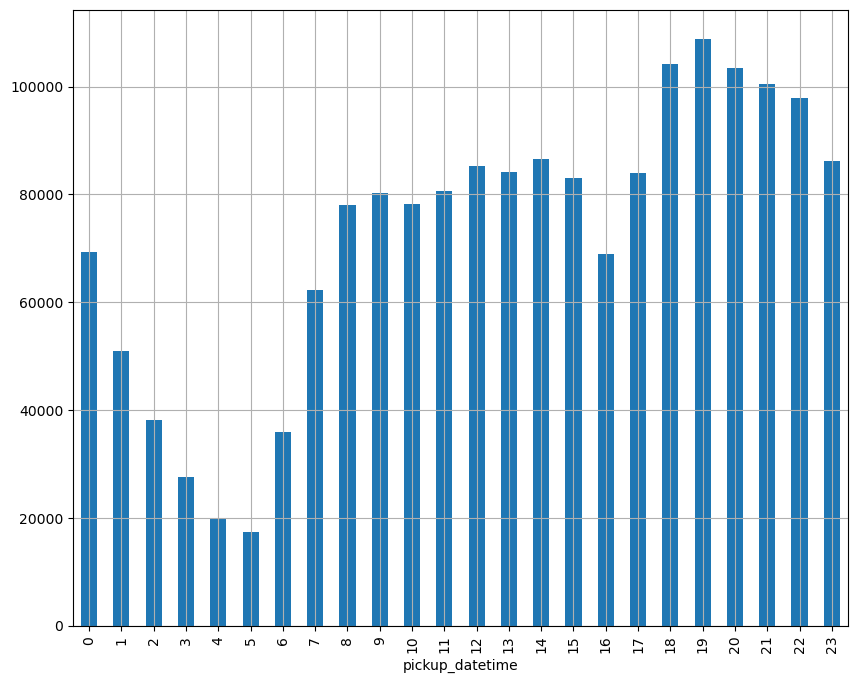

In [36]:
hourly_rides_num.plot.bar(figsize=(10, 8))
plt.grid()